In [1]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import os

DATA_ROOT_FOLDER = '/home/mitchell/Downloads/aerialimagelabeling/AerialImageDataset/train/'
IMAGES_FOLDER = DATA_ROOT_FOLDER + 'images/'
GT_FOLDER = DATA_ROOT_FOLDER + 'gt/'
OUTPUT_PATH_PREFIX = '/mnt/data_disk/cgpData/firstAttempt/firstAttempt'

NUM_IMAGES_PER_INPUT = 2
INPUT_WIDTH = 500
INPUT_HEIGHT = 500

random.seed(42)

In [2]:
def get_input_files():
    files = [f for f in os.listdir(IMAGES_FOLDER) if os.path.isfile(os.path.join(IMAGES_FOLDER, f))]
    files.sort()
    return files

print(get_input_files())

['austin1.tif', 'austin10.tif', 'austin11.tif', 'austin12.tif', 'austin13.tif', 'austin14.tif', 'austin15.tif', 'austin16.tif', 'austin17.tif', 'austin18.tif', 'austin19.tif', 'austin2.tif', 'austin20.tif', 'austin21.tif', 'austin22.tif', 'austin23.tif', 'austin24.tif', 'austin25.tif', 'austin26.tif', 'austin27.tif', 'austin28.tif', 'austin29.tif', 'austin3.tif', 'austin30.tif', 'austin31.tif', 'austin32.tif', 'austin33.tif', 'austin34.tif', 'austin35.tif', 'austin36.tif', 'austin4.tif', 'austin5.tif', 'austin6.tif', 'austin7.tif', 'austin8.tif', 'austin9.tif', 'chicago1.tif', 'chicago10.tif', 'chicago11.tif', 'chicago12.tif', 'chicago13.tif', 'chicago14.tif', 'chicago15.tif', 'chicago16.tif', 'chicago17.tif', 'chicago18.tif', 'chicago19.tif', 'chicago2.tif', 'chicago20.tif', 'chicago21.tif', 'chicago22.tif', 'chicago23.tif', 'chicago24.tif', 'chicago25.tif', 'chicago26.tif', 'chicago27.tif', 'chicago28.tif', 'chicago29.tif', 'chicago3.tif', 'chicago30.tif', 'chicago31.tif', 'chicago32

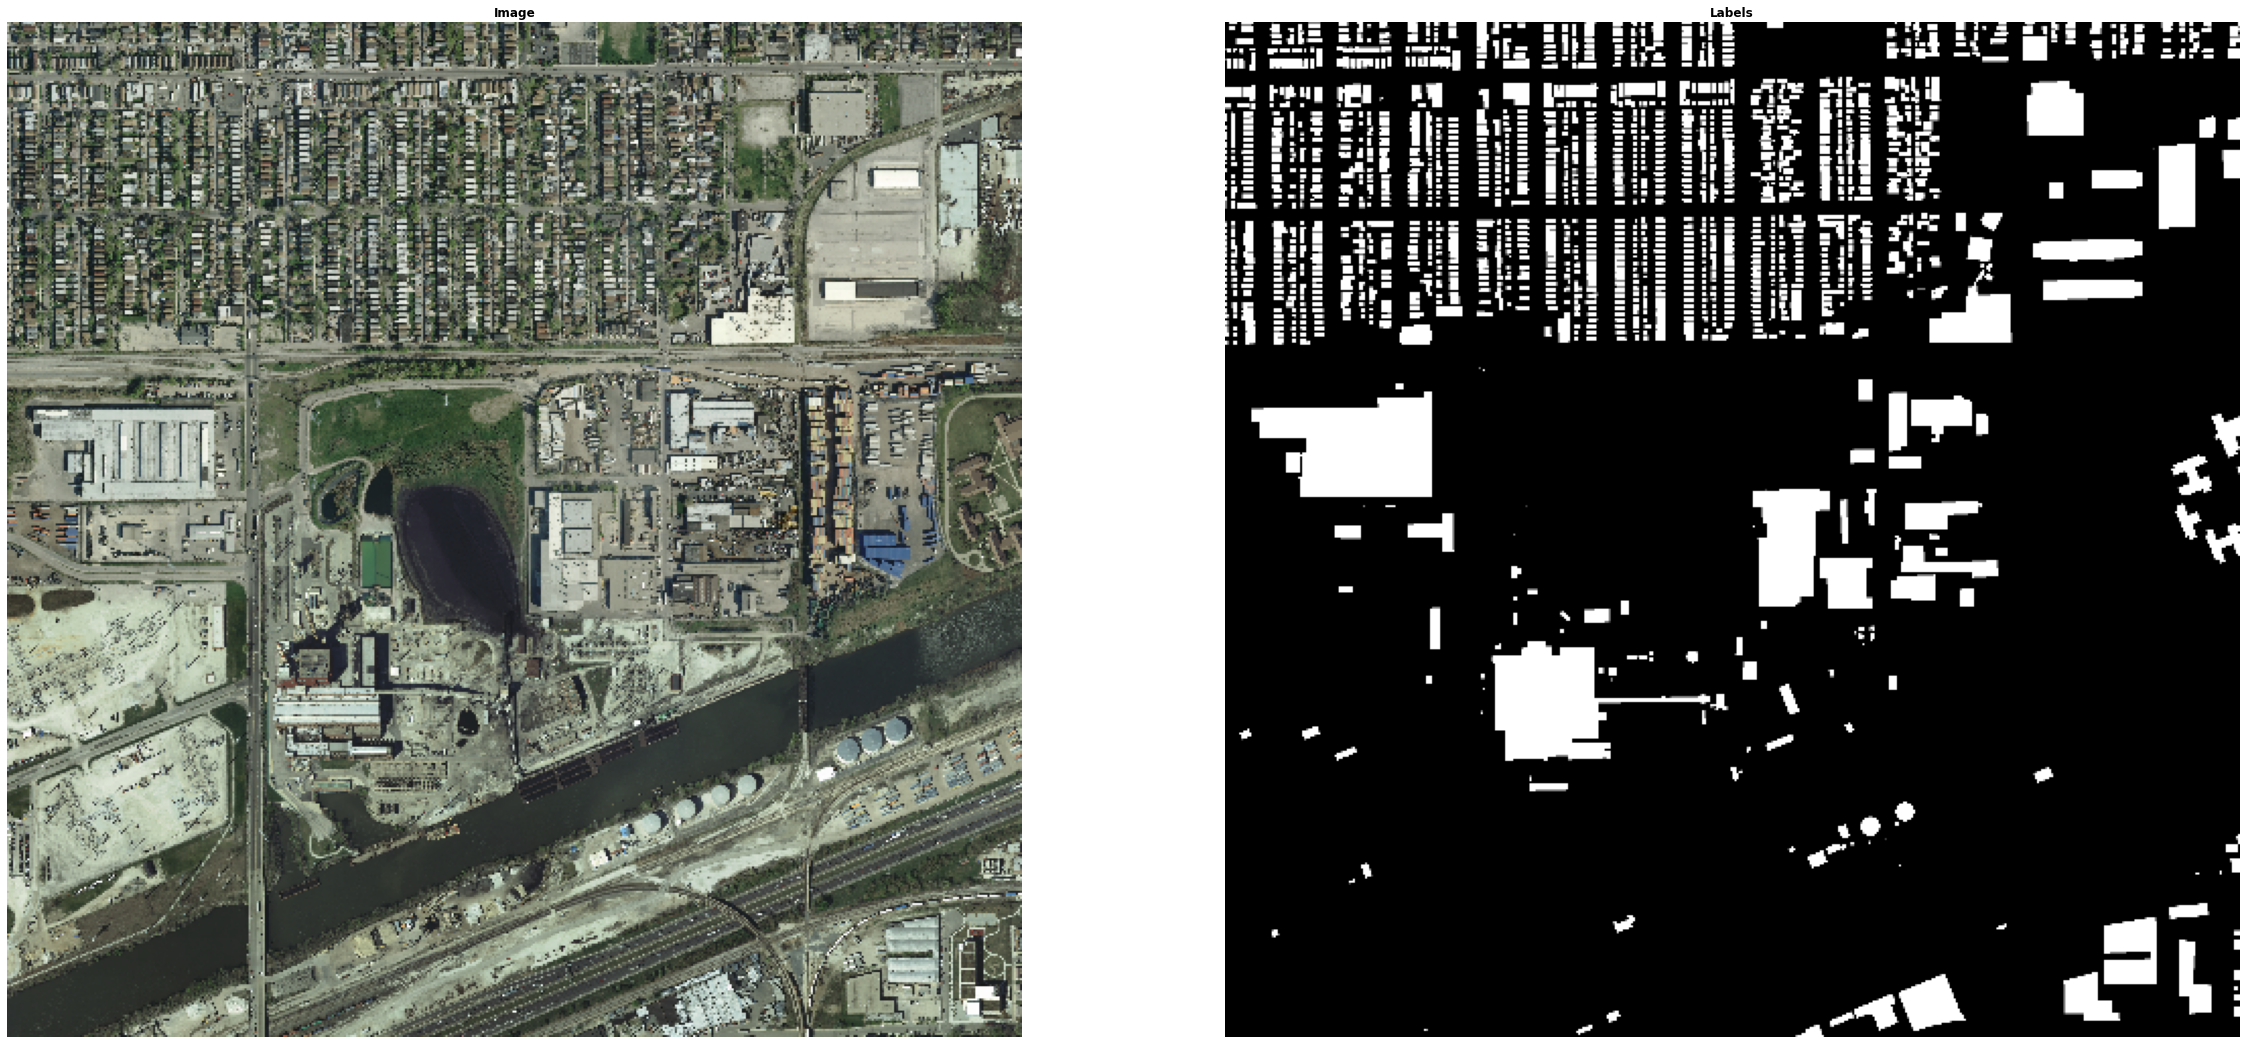

In [4]:
def show_image_and_label(image_name):
    color_image = cv2.imread(IMAGES_FOLDER + image_name, cv2.IMREAD_COLOR)
    labels = cv2.imread(GT_FOLDER + image_name, cv2.IMREAD_GRAYSCALE)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 20))
    
    ax[0].imshow(cv2.resize(color_image[...,::-1], (500, 500)))
    ax[0].set_title('Image', fontweight='bold')
    ax[0].set_axis_off()
    
    ax[1].imshow(cv2.resize(labels, (500, 500)), cmap='gray')
    ax[1].set_title('Labels', fontweight='bold')
    ax[1].set_axis_off()
    
    plt.show()
    
show_image_and_label('chicago1.tif')

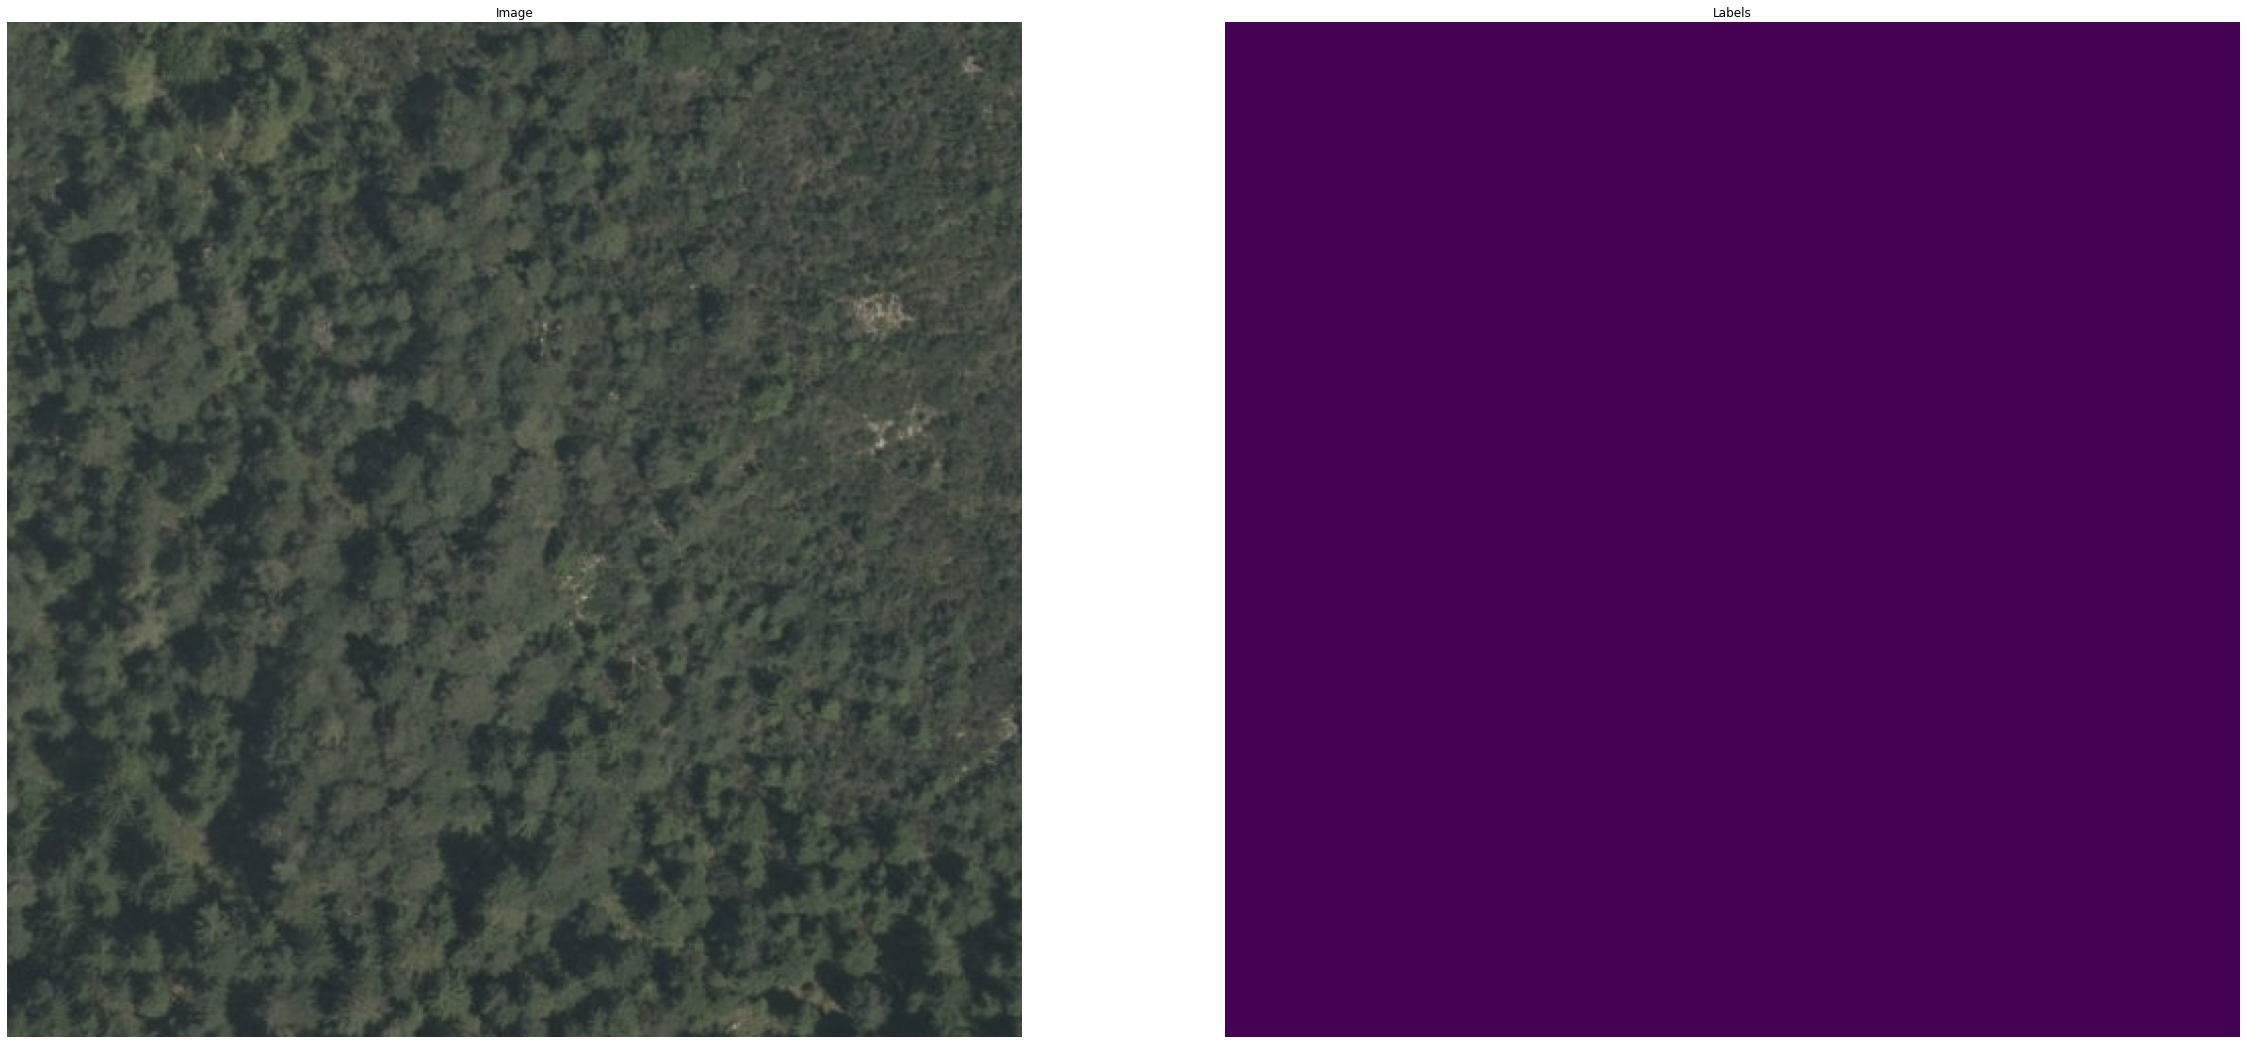

In [5]:
def select_random_box(image_pair):
    color_image = image_pair[0]
    labels = image_pair[1]
    
    max_width = color_image.shape[1] - INPUT_WIDTH
    max_height = color_image.shape[0] - INPUT_HEIGHT
    
    w_start = random.randint(0, max_width)
    h_start = random.randint(0, max_height)
    
    color_selected = color_image[h_start:h_start+INPUT_HEIGHT, w_start:w_start+INPUT_WIDTH, :]
    bw_selected = labels[h_start:h_start+INPUT_HEIGHT, w_start:w_start+INPUT_WIDTH]
    
    return (color_selected, bw_selected)

def test_select_region(image_name):
    color_image = cv2.imread(IMAGES_FOLDER + image_name, cv2.IMREAD_COLOR)[...,::-1]
    labels = cv2.imread(GT_FOLDER + image_name, cv2.IMREAD_GRAYSCALE)
    
    input_data = (color_image, labels)
    output_data = select_random_box(input_data)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 20))
    
    ax[0].imshow(output_data[0])
    ax[0].set_title('Image')
    ax[0].set_axis_off()
    
    ax[1].imshow(output_data[1])
    ax[1].set_title('Labels')
    ax[1].set_axis_off()
    
    plt.show()
    
test_select_region('tyrol-w20.tif')

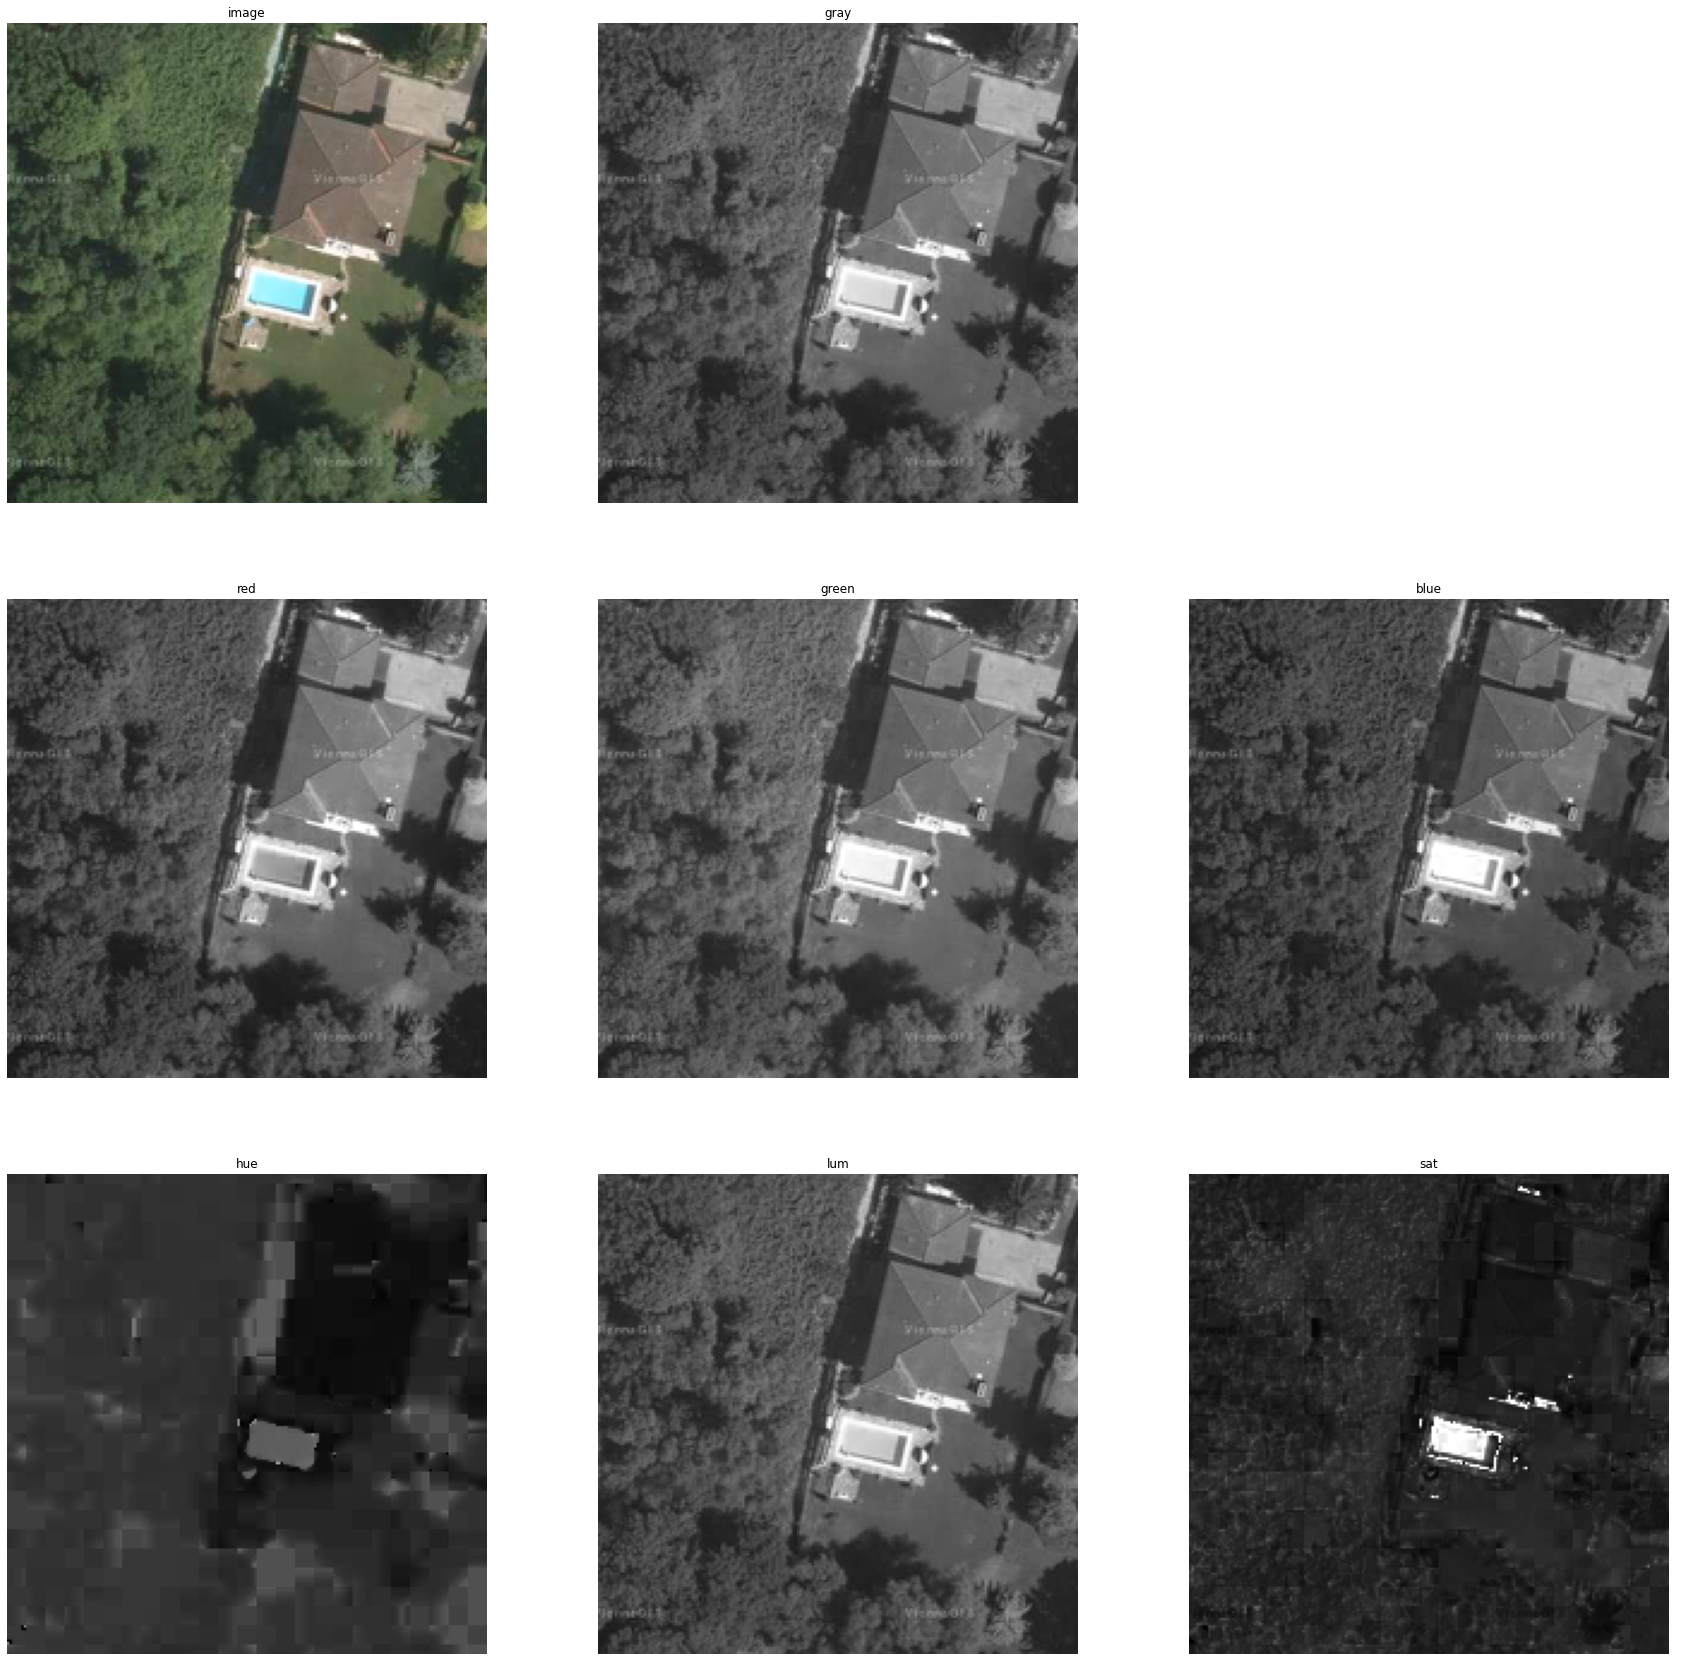

In [6]:
def test_transformations(image_name):
    sz = 200
    color_image = cv2.imread(IMAGES_FOLDER + image_name, cv2.IMREAD_COLOR)[...,::-1]
    
    test_patch = color_image[0:sz, 0:sz, :]
    
    r = test_patch[:, :, 0]
    g = test_patch[:, :, 1]
    b = test_patch[:, :, 2]
    gray = cv2.cvtColor(np.copy(test_patch), cv2.COLOR_RGB2GRAY)
    hls = cv2.cvtColor(np.copy(test_patch), cv2.COLOR_RGB2HLS)
    h = hls[:, :, 0]
    l = hls[:, :, 1]
    s = hls[:, :, 2]
    
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
    
    ax[0][0].set_title('image')
    ax[0][0].imshow(test_patch)
    
    ax[0][1].set_title('gray')
    ax[0][1].imshow(gray, cmap='gray', vmin=0, vmax=255)
    
    ax[1][0].set_title('red')
    ax[1][0].imshow(r, cmap='gray', vmin=0, vmax=255)
    
    ax[1][1].set_title('green')
    ax[1][1].imshow(g, cmap='gray', vmin=0, vmax=255)
    
    ax[1][2].set_title('blue')
    ax[1][2].imshow(b, cmap='gray', vmin=0, vmax=255)
    
    ax[2][0].set_title('hue')
    ax[2][0].imshow(h, cmap='gray', vmin=0, vmax=255)
    
    ax[2][1].set_title('lum')
    ax[2][1].imshow(l, cmap='gray', vmin=0, vmax=255)
    
    ax[2][2].set_title('sat')
    ax[2][2].imshow(s, cmap='gray', vmin=0, vmax=255)
    
    for i in range(0, 3, 1):
        for j in range(0, 3, 1):
            ax[i][j].set_axis_off()
            
    plt.show()
    
test_transformations('vienna1.tif')

In [7]:
def write_to_file(fd, image):
    assert(len(image.shape) == 2)
    assert(image.shape[0] == INPUT_WIDTH)
    assert(image.shape[1] == INPUT_HEIGHT)
    
    b = image.reshape(-1).tobytes()
    
    assert(len(b) == INPUT_WIDTH*INPUT_HEIGHT)
    
    fd.write(b)
    
def generate_datasets_internal(fds):
    red_fd = fds[0]
    blue_fd = fds[1]
    green_fd = fds[2]
    gray_fd = fds[3]
    h_fd = fds[4]
    l_fd = fds[5]
    s_fd = fds[6]
    label_fd = fds[7]
    
    files = get_input_files()
    
    num_files = len(files)
    file_count = 0
    for file in files:
        file_count += 1
        pct = (file_count / num_files) * 100.0
        print('Processing file {0}...({1} / {2}, {3:.2f}%)'.format(file, file_count, num_files, pct))
        color_image = cv2.imread(IMAGES_FOLDER + file, cv2.IMREAD_COLOR)[...,::-1]
        labels = cv2.imread(GT_FOLDER + file, cv2.IMREAD_GRAYSCALE)

        for i in range(0, NUM_IMAGES_PER_INPUT, 1):
            (selected_color, selected_label) = select_random_box((color_image, labels))
           
            r = selected_color[:, :, 0]
            g = selected_color[:, :, 1]
            b = selected_color[:, :, 2]
            gray = cv2.cvtColor(np.copy(selected_color), cv2.COLOR_RGB2GRAY)
            hls = cv2.cvtColor(np.copy(selected_color), cv2.COLOR_RGB2HLS)
            h = hls[:, :, 0]
            l = hls[:, :, 1]
            s = hls[:, :, 2]
    
            write_to_file(red_fd, r)
            write_to_file(green_fd, g)
            write_to_file(blue_fd, b)
            write_to_file(gray_fd, gray)
            write_to_file(h_fd, h)
            write_to_file(l_fd, l)
            write_to_file(s_fd, s)
            write_to_file(label_fd, selected_label)
            
def generate_datasets(output_prefix):
    red_output_filename = output_prefix + '_r.dat'
    blue_output_filename = output_prefix + '_b.dat'
    green_output_filename = output_prefix + '_g.dat'
    gray_output_filename = output_prefix + '_gray.dat'
    h_output_filename = output_prefix + '_h.dat'
    l_output_filename = output_prefix + '_l.dat'
    s_output_filename = output_prefix + '_s.dat'
    label_output_filename = output_prefix + '_label.dat'
    
    with open(red_output_filename, 'wb') as rfd:
        with open(blue_output_filename, 'wb') as bfd:
            with open(green_output_filename, 'wb') as gfd:
                with open(gray_output_filename, 'wb') as grayfd:
                    with open(h_output_filename, 'wb') as hfd:
                        with open(l_output_filename, 'wb') as lfd:
                            with open(s_output_filename, 'wb') as sfd:
                                with open(label_output_filename, 'wb') as labelfd:
                                    fds = []
                                    fds.append(rfd)
                                    fds.append(bfd)
                                    fds.append(gfd)
                                    fds.append(grayfd)
                                    fds.append(hfd)
                                    fds.append(lfd)
                                    fds.append(sfd)
                                    fds.append(labelfd)
                                    
                                    generate_datasets_internal(fds)
                                    
    print('Done!')
            
generate_datasets(OUTPUT_PATH_PREFIX)

Processing file austin1.tif...(1 / 180, 0.56%)
Processing file austin10.tif...(2 / 180, 1.11%)
Processing file austin11.tif...(3 / 180, 1.67%)
Processing file austin12.tif...(4 / 180, 2.22%)
Processing file austin13.tif...(5 / 180, 2.78%)
Processing file austin14.tif...(6 / 180, 3.33%)
Processing file austin15.tif...(7 / 180, 3.89%)
Processing file austin16.tif...(8 / 180, 4.44%)
Processing file austin17.tif...(9 / 180, 5.00%)
Processing file austin18.tif...(10 / 180, 5.56%)
Processing file austin19.tif...(11 / 180, 6.11%)
Processing file austin2.tif...(12 / 180, 6.67%)
Processing file austin20.tif...(13 / 180, 7.22%)
Processing file austin21.tif...(14 / 180, 7.78%)
Processing file austin22.tif...(15 / 180, 8.33%)
Processing file austin23.tif...(16 / 180, 8.89%)
Processing file austin24.tif...(17 / 180, 9.44%)
Processing file austin25.tif...(18 / 180, 10.00%)
Processing file austin26.tif...(19 / 180, 10.56%)
Processing file austin27.tif...(20 / 180, 11.11%)
Processing file austin28.tif

Processing file vienna27.tif...(164 / 180, 91.11%)
Processing file vienna28.tif...(165 / 180, 91.67%)
Processing file vienna29.tif...(166 / 180, 92.22%)
Processing file vienna3.tif...(167 / 180, 92.78%)
Processing file vienna30.tif...(168 / 180, 93.33%)
Processing file vienna31.tif...(169 / 180, 93.89%)
Processing file vienna32.tif...(170 / 180, 94.44%)
Processing file vienna33.tif...(171 / 180, 95.00%)
Processing file vienna34.tif...(172 / 180, 95.56%)
Processing file vienna35.tif...(173 / 180, 96.11%)
Processing file vienna36.tif...(174 / 180, 96.67%)
Processing file vienna4.tif...(175 / 180, 97.22%)
Processing file vienna5.tif...(176 / 180, 97.78%)
Processing file vienna6.tif...(177 / 180, 98.33%)
Processing file vienna7.tif...(178 / 180, 98.89%)
Processing file vienna8.tif...(179 / 180, 99.44%)
Processing file vienna9.tif...(180 / 180, 100.00%)
Done!
